In [1]:
import numpy as np
import pandas as pd
import os
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
import mlflow
import mlflow.sklearn

In [2]:
df = pd.read_csv(r"E:\DATA SCIENCE & AI\DATASET\youtube_comment_analysis\final_processed_df.csv")

In [3]:
df.dropna(subset=['clean_comment'],inplace=True)

In [4]:
df.isnull().sum()

clean_comment    0
category         0
dtype: int64

## **Setting the experiment tracking....**

In [5]:
import dagshub
dagshub.init(repo_owner='Pravat-21', repo_name='ML-Project-YouTube-Comment-Analysis', mlflow=True)
mlflow.set_tracking_uri("https://dagshub.com/Pravat-21/ML-Project-YouTube-Comment-Analysis.mlflow")

Accessing as Pravat-21

Initialized MLflow to track repo "Pravat-21/ML-Project-YouTube-Comment-Analysis"

Repository Pravat-21/ML-Project-YouTube-Comment-Analysis initialized!

In [ ]:
mlflow.set_experiment("Exp-3: TF-IDF Max feature finding")

2025/11/04 17:17:30 INFO mlflow.tracking.fluent: Experiment with name 'Exp-4: TF-IDF Max feature finding' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/284ae2d331134026ab9c8af6afc7c612', creation_time=1762256850578, experiment_id='3', last_update_time=1762256850578, lifecycle_stage='active', name='Exp-4: TF-IDF Max feature finding', tags={}>

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import os

2025/11/04 17:45:09 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run TF-IDF with 800 at: https://dagshub.com/Pravat-21/ML-Project-YouTube-Comment-Analysis.mlflow/#/experiments/3/runs/46a53b321c5444849e6789384c4b3da9
🧪 View experiment at: https://dagshub.com/Pravat-21/ML-Project-YouTube-Comment-Analysis.mlflow/#/experiments/3


2025/11/04 17:46:19 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run TF-IDF with 1000 at: https://dagshub.com/Pravat-21/ML-Project-YouTube-Comment-Analysis.mlflow/#/experiments/3/runs/d715d69a4d1245acb90fc3326d636ad1
🧪 View experiment at: https://dagshub.com/Pravat-21/ML-Project-YouTube-Comment-Analysis.mlflow/#/experiments/3


2025/11/04 17:47:18 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run TF-IDF with 2000 at: https://dagshub.com/Pravat-21/ML-Project-YouTube-Comment-Analysis.mlflow/#/experiments/3/runs/9a9fa8946f3e460c9fa011bfb3ad2369
🧪 View experiment at: https://dagshub.com/Pravat-21/ML-Project-YouTube-Comment-Analysis.mlflow/#/experiments/3


2025/11/04 17:48:01 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run TF-IDF with 3000 at: https://dagshub.com/Pravat-21/ML-Project-YouTube-Comment-Analysis.mlflow/#/experiments/3/runs/1306a3746bc84544ac3e0a09476e9d88
🧪 View experiment at: https://dagshub.com/Pravat-21/ML-Project-YouTube-Comment-Analysis.mlflow/#/experiments/3


2025/11/04 17:48:43 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run TF-IDF with 4000 at: https://dagshub.com/Pravat-21/ML-Project-YouTube-Comment-Analysis.mlflow/#/experiments/3/runs/8fea355fb6d94bebbcdd275a780c7db4
🧪 View experiment at: https://dagshub.com/Pravat-21/ML-Project-YouTube-Comment-Analysis.mlflow/#/experiments/3


2025/11/04 17:49:28 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run TF-IDF with 5000 at: https://dagshub.com/Pravat-21/ML-Project-YouTube-Comment-Analysis.mlflow/#/experiments/3/runs/273029c11695457ca591cec9b39eb4cb
🧪 View experiment at: https://dagshub.com/Pravat-21/ML-Project-YouTube-Comment-Analysis.mlflow/#/experiments/3


2025/11/04 17:50:12 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run TF-IDF with 7000 at: https://dagshub.com/Pravat-21/ML-Project-YouTube-Comment-Analysis.mlflow/#/experiments/3/runs/28edbb00e21c46009bc725d0b88a85f8
🧪 View experiment at: https://dagshub.com/Pravat-21/ML-Project-YouTube-Comment-Analysis.mlflow/#/experiments/3


2025/11/04 17:50:57 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run TF-IDF with 9000 at: https://dagshub.com/Pravat-21/ML-Project-YouTube-Comment-Analysis.mlflow/#/experiments/3/runs/511bad3c51954b98b68af5ed8ad950ac
🧪 View experiment at: https://dagshub.com/Pravat-21/ML-Project-YouTube-Comment-Analysis.mlflow/#/experiments/3


2025/11/04 17:51:41 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run TF-IDF with 10000 at: https://dagshub.com/Pravat-21/ML-Project-YouTube-Comment-Analysis.mlflow/#/experiments/3/runs/4ec052d1bc6e48d9b52a49fc40245cda
🧪 View experiment at: https://dagshub.com/Pravat-21/ML-Project-YouTube-Comment-Analysis.mlflow/#/experiments/3


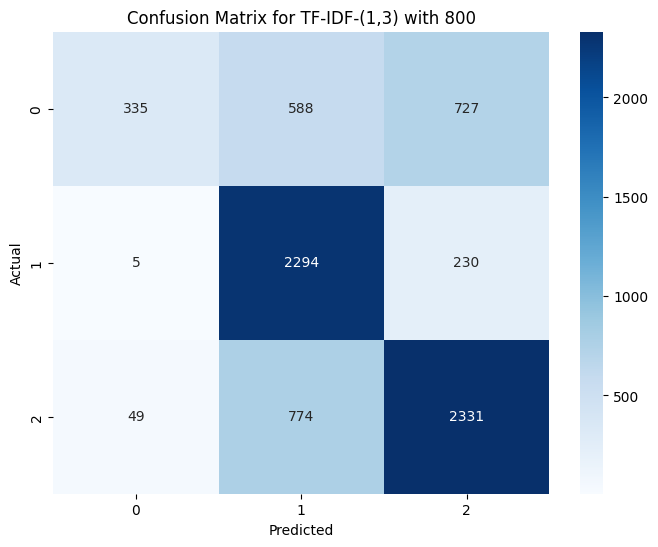

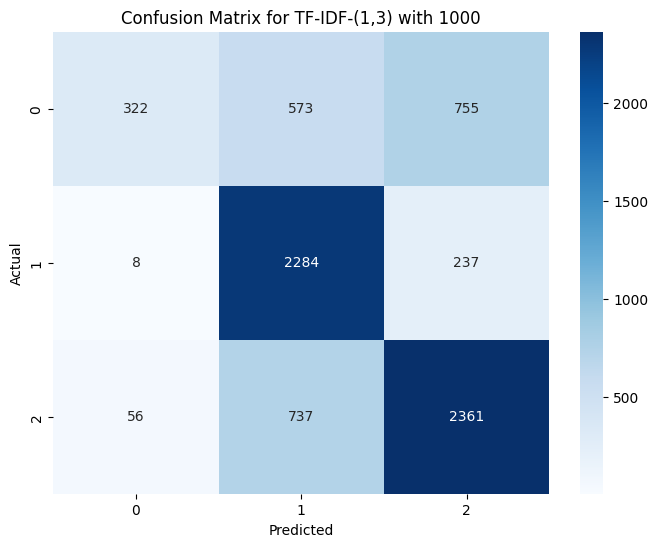

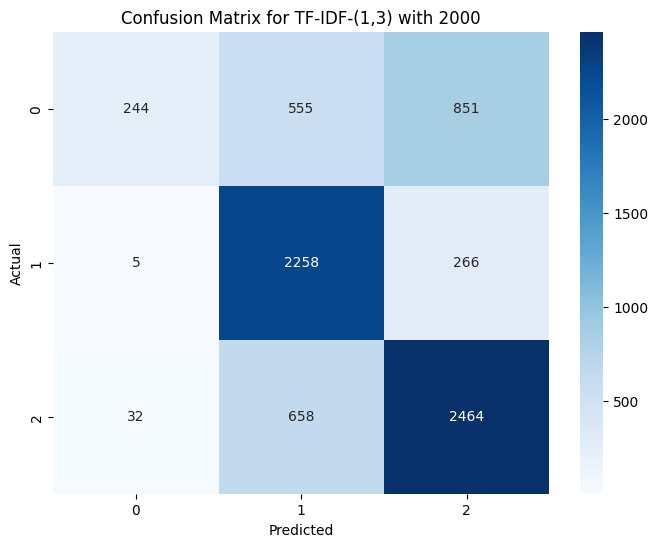

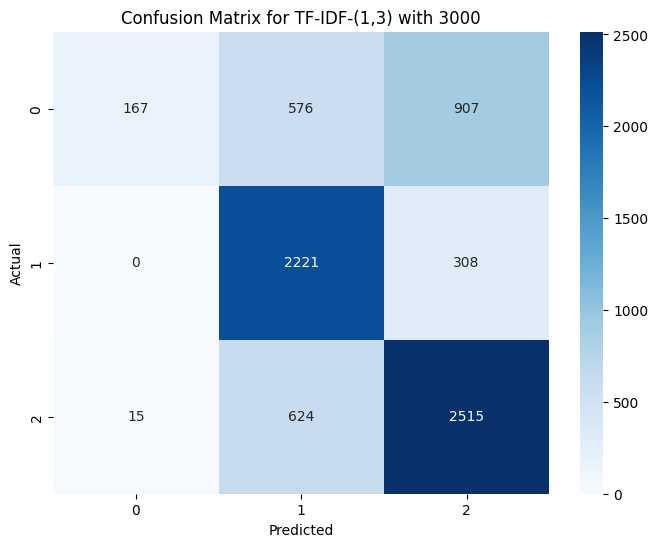

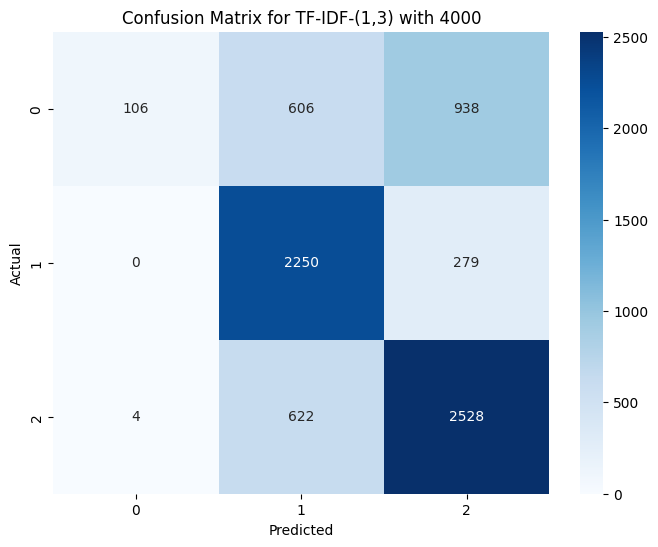

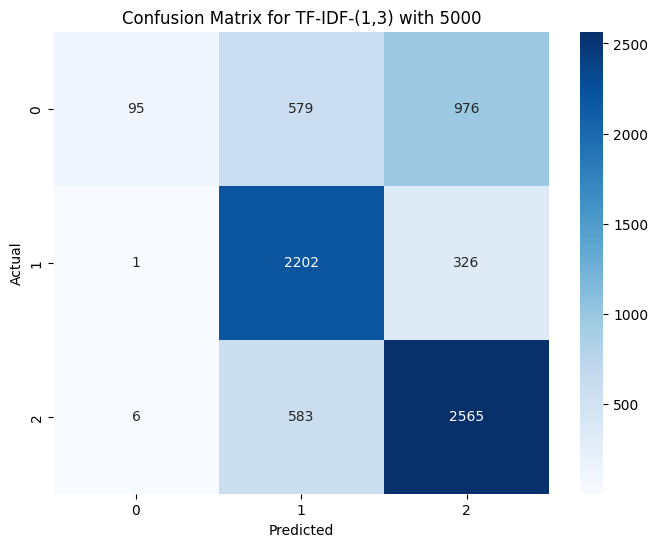

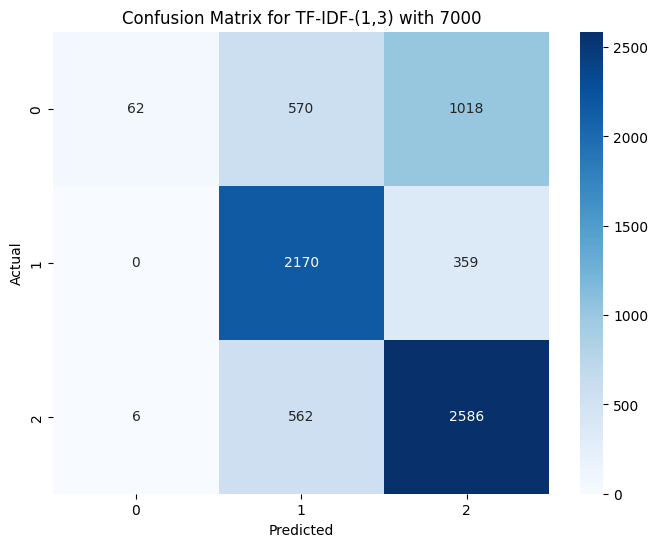

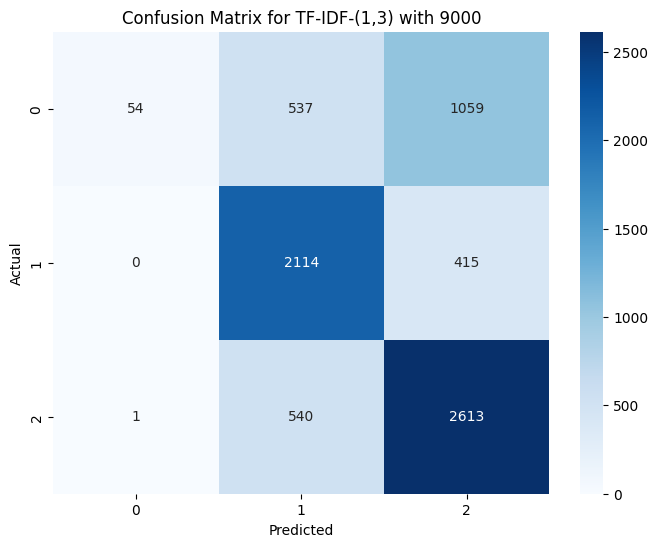

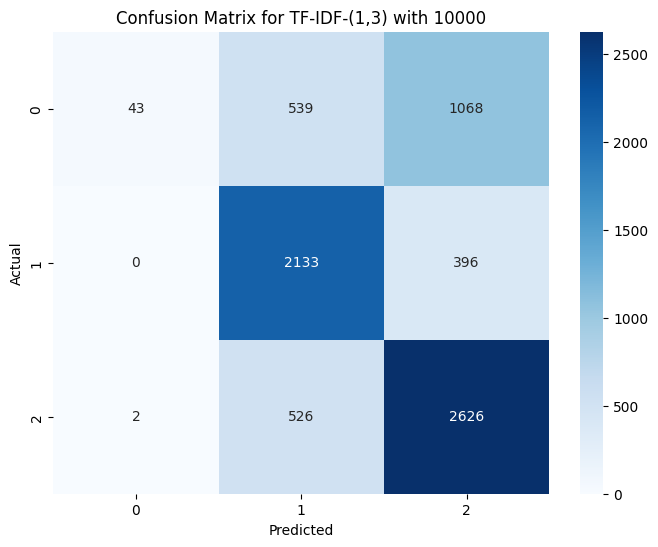

In [9]:
def run_experiment_tfidf_mx_feture(max_features):

    #=====================================================================================================
    ngram_range = (1,3)
    vectorizer = TfidfVectorizer(ngram_range=ngram_range,max_features= max_features)

    #=====================================================================================================

    X = vectorizer.fit_transform(df['clean_comment'])
    y= df["category"]
    #=====================================================================================================

    X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=42,test_size=0.2,stratify=y)

    with mlflow.start_run() as run:

        mlflow.set_tag("mlflow.runName", f"TF-IDF with {max_features}")
        mlflow.set_tags(
		{

            "experiment_type":"Feature Engineering",
            "model_type":"RandomForestClassifier",
            "Description":"Finding the best value for max_features for TF-IDF with trigram"
        }
        )

        n_estimators=150
        max_depth=20


        mlflow.log_params({
        "vectorizer_type":"TF-IDF",
        "ngram-range":f"{ngram_range}",
        "Vectorizer_max_feature":vectorizer.max_features,
        "max_depth":max_depth,
        "n_estimators":n_estimators
        })

        model=RandomForestClassifier(n_estimators=n_estimators,max_depth=max_depth,random_state=42)
        model.fit(X_train,y_train)

        y_pred=model.predict(X_test)
        
        accuracy=accuracy_score(y_test,y_pred)
        
        mlflow.log_metric("accuracy",accuracy)
        
        

        class_rep = classification_report(y_test,y_pred,output_dict=True)
        
        for label, metrics in class_rep.items():
            if isinstance(metrics, dict):  # for precision, recall, f1-score
                for metric, value in metrics.items():
                    mlflow.log_metric(f"{label}_{metric}", value)
                    
        con_matrix = confusion_matrix(y_test,y_pred)
        
        plt.figure(figsize=(8,6))
        sns.heatmap(con_matrix,annot=True, fmt="d",cmap="Blues")
        plt.title(f"Confusion Matrix for TF-IDF-(1,3) with {max_features}")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        

        plt.savefig(f"TF-IDF_trigram_confusion_matrix.png")
        
        mlflow.log_artifact(f"TF-IDF_trigram_confusion_matrix.png")
        
        mlflow.sklearn.log_model(model, "Random_Forest_classifier_TF-IDF_trigram")


#======================================================================================================
max_feature_value=[800,1000,2000,3000,4000,5000,7000,9000,10000]


for max_features in max_feature_value:

    run_experiment_tfidf_mx_feture(max_features)

